# M5 Forecasting Competition - Accuracy
## Part 2
## Forecast

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [130]:
pip install cython

Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [132]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\inspiron\Anaconda3

  added / updated specs:
    - conda


The following packages will be REMOVED:

  python_abi-3.7-1_cp37m

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> pkgs/main::conda-4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [133]:
conda install -c conda-forge fbprophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\inspiron\Anaconda3

  added / updated specs:
    - fbprophet


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [134]:
pip install plotly==4.8.1

Note: you may need to restart the kernel to use updated packages.


In [135]:
from fbprophet import Prophet

In [136]:
sales=pd.read_csv("sales_train_validation.csv")
calendar=pd.read_csv("calendar.csv")

**CREATE OUR DATAFRAME**

In [211]:
sales_dept = sales.groupby(['dept_id']).sum() 
sales_item = sales.groupby(['item_id']).sum() 
sales_cat = sales.groupby(['cat_id']).sum().T
sales_cat['day'] = sales_cat.index
sales_store = sales.groupby(['store_id']).sum()
sales_state_id = sales.groupby(['state_id']).sum()

In [138]:
calendar_df = calendar.iloc[:, [0, 2,3,4,5,6,7]]
categories = pd.merge(calendar_df, sales_cat, how = 'inner', left_on='d', right_on='day')
categories_df = categories.iloc[:,[7,8,9]]
categories_df.index = categories["date"]
categories_df.index = pd.to_datetime(categories_df.index , format = '%Y-%m-%d')
categories_df.parse_dates=categories_df.index
categories_df.head()

C:\Users\inspiron\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729


In [139]:
ts=categories_df

**some plots to observe our dataframe's trend and seasonality**

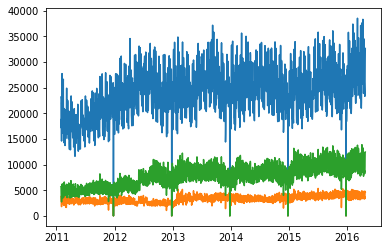

In [140]:
plt.plot(ts)

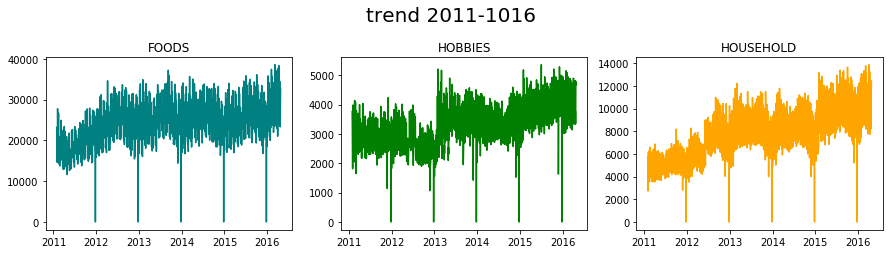

In [143]:
fig=plt.figure(figsize=(15,7))
fig.suptitle("trend 2011-1016",
            fontsize=20)

ax1=fig.add_subplot(231)
ax1.set_title("FOODS")
ax1.plot(categories_df.index,ts["FOODS"],color="teal")

ax2=fig.add_subplot(232)
ax2.set_title("HOBBIES")
ax2.plot(categories_df.index,ts["HOBBIES"],color="green")

ax3=fig.add_subplot(233)
ax3.set_title("HOUSEHOLD")
ax3.plot(categories_df.index,ts["HOUSEHOLD"],color="orange")

plt.show()


In [144]:
ts.reset_index(inplace=True)

In [145]:
ts.head()

,date,FOODS,HOBBIES,HOUSEHOLD
0,2011-01-29,23178,3764,5689
1,2011-01-30,22758,3357,5634
2,2011-01-31,17174,2682,3927
3,2011-02-01,18878,2669,3865
4,2011-02-02,14603,1814,2729


**create the proper format for Prophet**

In [146]:
food=ts[["date", "FOODS"]].rename(columns={"date": "ds",
                 "FOODS": "y"});

hobby=ts[["date", "HOBBIES"]].rename(columns={"date": "ds",
                 "HOBBIES": "y"});

household=ts[["date", "HOUSEHOLD"]].rename(columns={"date": "ds",
                 "HOUSEHOLD": "y"});

**fit the method with the historical dataframes, one for each category**

In [147]:
model_food = Prophet(interval_width=0.95)
model_food.fit(food)

model_hobby = Prophet(interval_width=0.95)
model_hobby.fit(hobby)

model_household = Prophet(interval_width=0.95)
model_household.fit(household)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**FOOD Predictions**

In [148]:
food_forecast = model_food.make_future_dataframe(periods=28)
food_forecast = model_food.predict(food_forecast)
food_forecast[["ds","yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1936,2016-05-18,23872.047636,18298.058220,29478.070489
1937,2016-05-19,24033.177387,18977.550924,29106.504873
1938,2016-05-20,26525.614360,21505.975588,31964.234864
1939,2016-05-21,31419.425491,26365.531108,36718.696964
1940,2016-05-22,31750.614077,26650.235021,37255.812320


In [149]:
food_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 19 columns):
ds                            1941 non-null datetime64[ns]
trend                         1941 non-null float64
yhat_lower                    1941 non-null float64
yhat_upper                    1941 non-null float64
trend_lower                   1941 non-null float64
trend_upper                   1941 non-null float64
additive_terms                1941 non-null float64
additive_terms_lower          1941 non-null float64
additive_terms_upper          1941 non-null float64
weekly                        1941 non-null float64
weekly_lower                  1941 non-null float64
weekly_upper                  1941 non-null float64
yearly                        1941 non-null float64
yearly_lower                  1941 non-null float64
yearly_upper                  1941 non-null float64
multiplicative_terms          1941 non-null float64
multiplicative_terms_lower    1941 non-null float64
mu

**Plot FOOD Prediction**

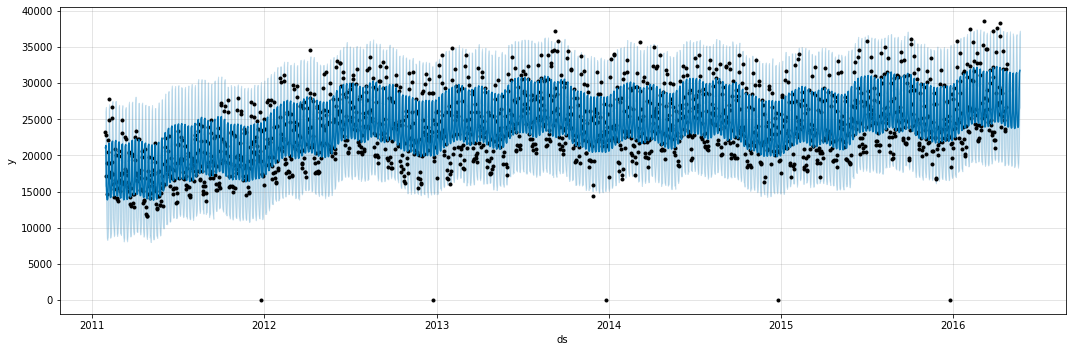

In [151]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
foodfig = model_food.plot(food_forecast,
                 ax=ax)
plt.show()

**explanation: black dots: observed values, blue line: forecasted values, shades: uncertainty intervals of our forecast**

**Food Prediction with trend changepoints**

<Figure size 1296x432 with 0 Axes>

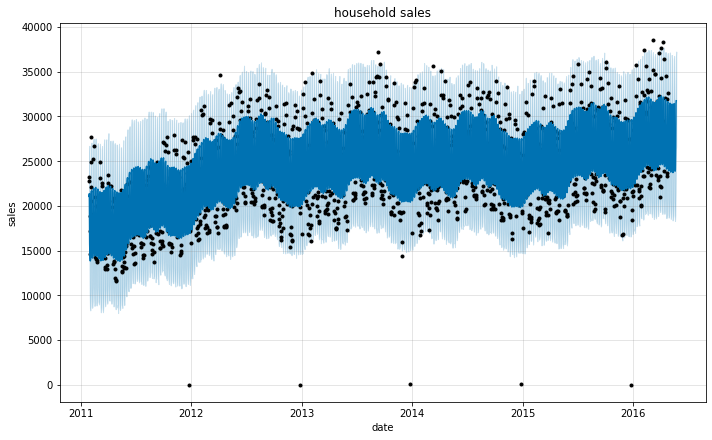

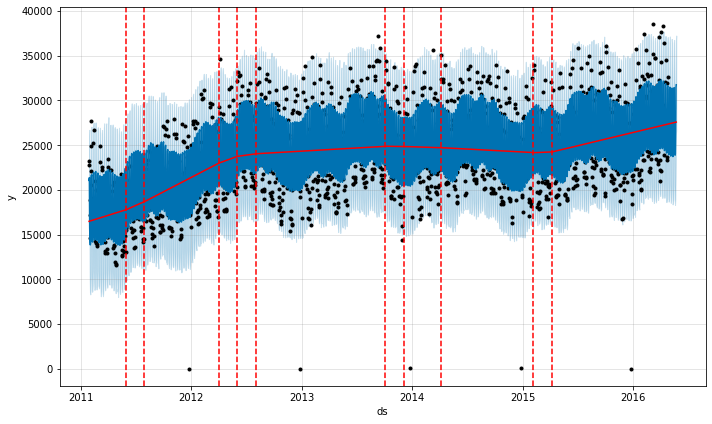

In [153]:
#trend changepoints
from fbprophet.plot import add_changepoints_to_plot
plt.figure(figsize=(18, 6))
model_food.plot(food_forecast, xlabel ="date", ylabel="sales")
plt.title("household sales")
tcp_f = model_food.plot(food_forecast)
a = add_changepoints_to_plot(tcp_f.gca(), model_food, food_forecast)

**HOBBY and HOUSEHOLD Predictions**

In [154]:
hobby_forecast = model_hobby.make_future_dataframe(periods=28)
hobby_forecast = model_hobby.predict(hobby_forecast)
hobby_forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail();

household_forecast = model_household.make_future_dataframe(periods=28)
household_forecast = model_household.predict(household_forecast)
household_forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail();

**Plot HOBBY Prediction**

Text(0.5, 1, 'hobby sales')

<Figure size 1296x432 with 0 Axes>

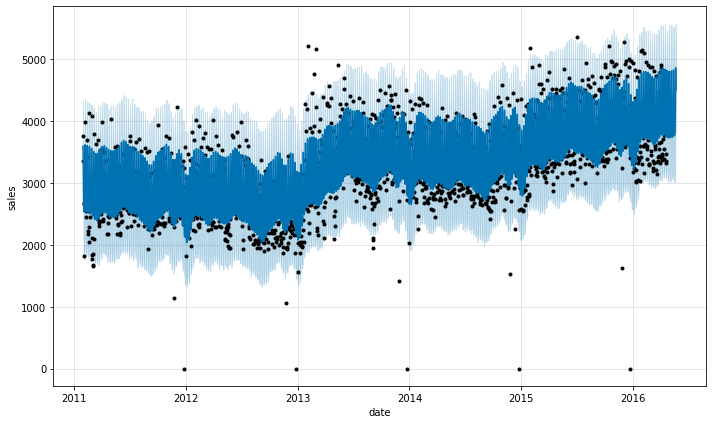

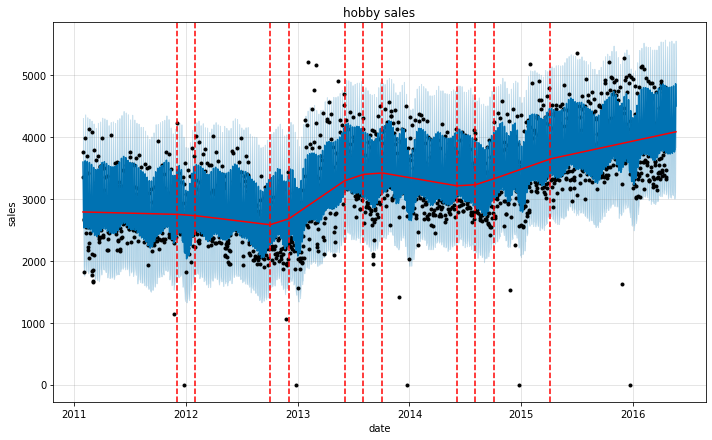

In [155]:
plt.figure(figsize=(18, 6))
model_hobby.plot(hobby_forecast, xlabel ="date", ylabel="sales")
a = add_changepoints_to_plot(model_hobby.plot(hobby_forecast, xlabel ="date", ylabel="sales")
.gca(), model_hobby, hobby_forecast)
plt.title("hobby sales")

**Plot HOUSEHOLD Prediction**

Text(0.5, 1, 'household sales')

<Figure size 1296x432 with 0 Axes>

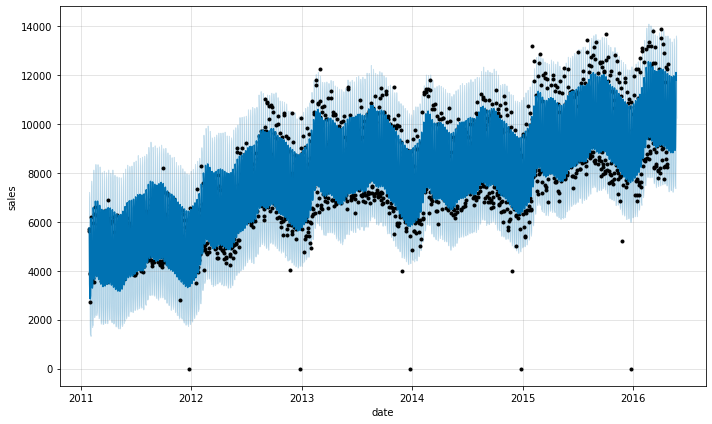

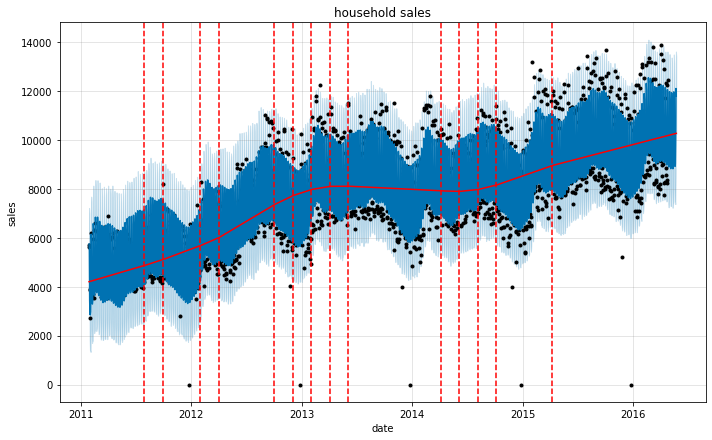

In [156]:
plt.figure(figsize=(18, 6))
model_household.plot(household_forecast, xlabel ="date", ylabel="sales")
a = add_changepoints_to_plot(model_household.plot(household_forecast, xlabel ="date", ylabel="sales")
.gca(), model_household, household_forecast)
plt.title("household sales")

**We merged original and forecast data of each category in order to make subplots of past and future**

**FOOD**

In [157]:
comb_f_df = food.join(food_forecast[["yhat", "yhat_lower", "yhat_upper"]], how = "outer")
comb_f_df.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2011-01-29,23178.0,21055.204245,15759.431874,26113.096123
1,2011-01-30,22758.0,21362.055154,16672.128000,26714.497478
2,2011-01-31,17174.0,15800.136706,10248.144481,21119.074335
3,2011-02-01,18878.0,14116.943977,8520.528830,19376.092751
4,2011-02-02,14603.0,13842.011061,8307.856178,18868.942689


*y=the original data sales and yhat=the forecast data sales*


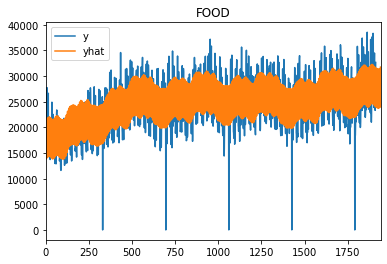

In [159]:
comb_f_df[["y", "yhat"]].plot(title="FOOD")


**From the chart we can see that the forecast is pretty good when plotted against the actual model**

In [161]:
#hobby
comb_h_df = hobby.join(hobby_forecast[["yhat", "yhat_lower", "yhat_upper"]], how = "outer")
comb_h_df.head();
#household
comb_hh_df = household.join(household_forecast[["yhat", "yhat_lower", "yhat_upper"]], how = "outer")
comb_hh_df.head();

**HOBBIES**

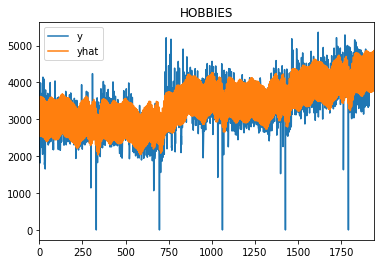

In [162]:
comb_h_df[["y", "yhat"]].plot(title="HOBBIES")

**HOUSEHOLD**

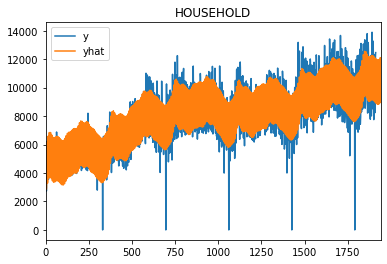

In [163]:
comb_hh_df[["y", "yhat"]].plot(title="HOUSEHOLD")

**Plot the components without holidays**

**FOODS**

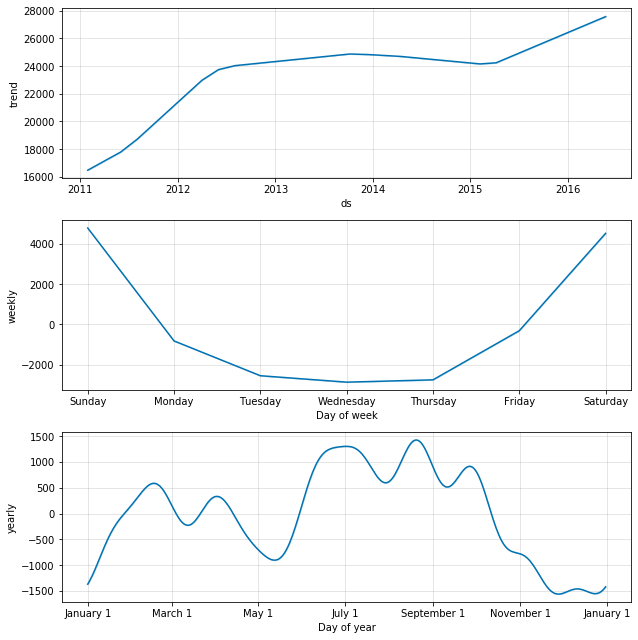

In [165]:
figf=model_food.plot_components(food_forecast)


**HOBBIES**

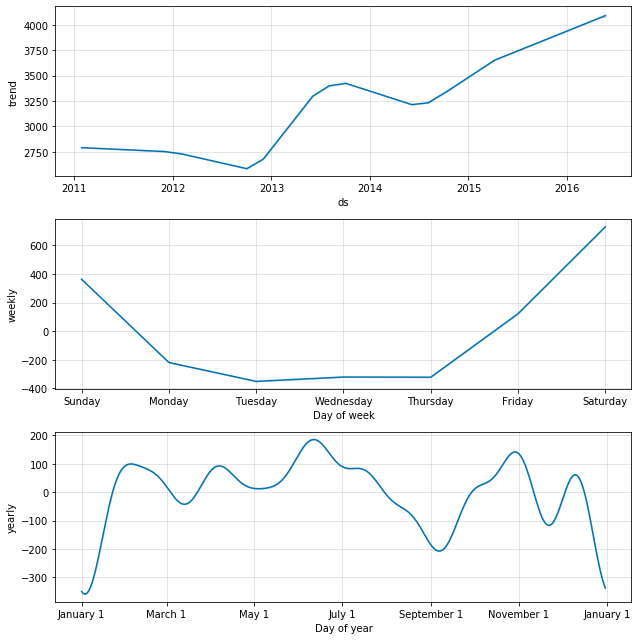

In [167]:
figh=model_hobby.plot_components(hobby_forecast)


**HOUSEHOLD**

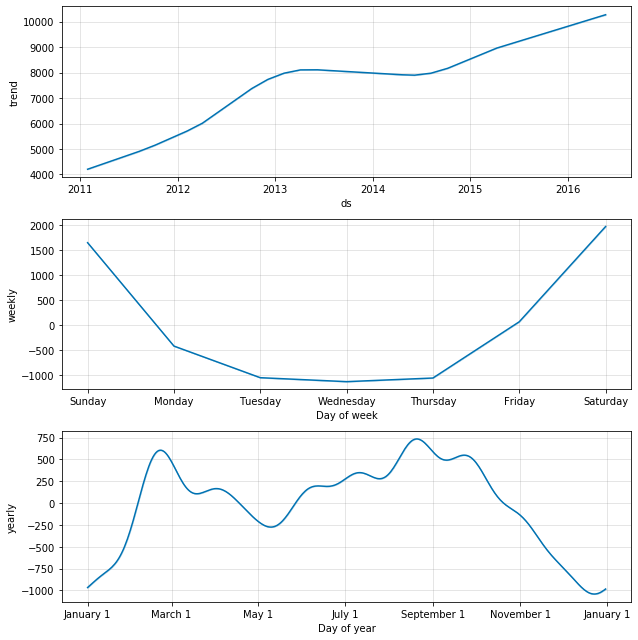

In [169]:
fighh=model_household.plot_components(household_forecast)


**Observation for the trend: is cyclical as seen in the rise and fall pattern**

**Now we merge all the forecasts together**

In [171]:
food_names = ['food_%s' % column for column in food_forecast.columns]
hobby_names = ['hobby_%s' % column for column in hobby_forecast.columns]
household_names = ['household_%s' % column for column in household_forecast.columns]

merge_food_forecast = food_forecast.copy()
merge_hobby_forecast = hobby_forecast.copy()
merge_household_forecast = household_forecast.copy()

merge_food_forecast.columns = food_names
merge_hobby_forecast.columns = hobby_names
merge_household_forecast.columns = household_names

forecast = pd.merge(merge_food_forecast,merge_hobby_forecast, how = 'inner', left_on = 'food_ds', right_on = 'hobby_ds')
forecast = forecast.rename(columns={'food_ds': 'Date'}).drop('hobby_ds', axis=1)

nforecast = pd.merge(forecast,merge_household_forecast, how = 'inner', left_on = 'Date', right_on = 'household_ds')
nforecast = nforecast.rename(columns={'Date': 'Date'}).drop('household_ds', axis=1)

nforecast.head()

,Date,food_trend,food_yhat_lower,food_yhat_upper,food_trend_lower,food_trend_upper,food_additive_terms,food_additive_terms_lower,food_additive_terms_upper,food_weekly,...,household_weekly,household_weekly_lower,household_weekly_upper,household_yearly,household_yearly_lower,household_yearly_upper,household_multiplicative_terms,household_multiplicative_terms_lower,household_multiplicative_terms_upper,household_yhat
0,2011-01-29,16477.673841,15759.431874,26113.096123,16477.673841,16477.673841,4577.530404,4577.530404,4577.530404,4519.435878,...,1975.090946,1975.090946,1975.090946,-432.768123,-432.768123,-432.768123,0.0,0.0,0.0,5747.760185
1,2011-01-30,16488.237994,16672.128000,26714.497478,16488.237994,16488.237994,4873.817160,4873.817160,4873.817160,4783.734629,...,1651.344156,1651.344156,1651.344156,-386.254011,-386.254011,-386.254011,0.0,0.0,0.0,5474.135178
2,2011-01-31,16498.802147,10248.144481,21119.074335,16498.802147,16498.802147,-698.665442,-698.665442,-698.665442,-821.161508,...,-424.591639,-424.591639,-424.591639,-336.668512,-336.668512,-336.668512,0.0,0.0,0.0,3451.392552
3,2011-02-01,16509.366300,8520.528830,19376.092751,16509.366300,16509.366300,-2392.422323,-2392.422323,-2392.422323,-2547.938879,...,-1059.601097,-1059.601097,-1059.601097,-284.254909,-284.254909,-284.254909,0.0,0.0,0.0,2872.404368
4,2011-02-02,16519.930454,8307.856178,18868.942689,16519.930454,16519.930454,-2677.919393,-2677.919393,-2677.919393,-2867.159942,...,-1138.979569,-1138.979569,-1138.979569,-229.328508,-229.328508,-229.328508,0.0,0.0,0.0,2851.559967


**PLOT : Sales Trend**

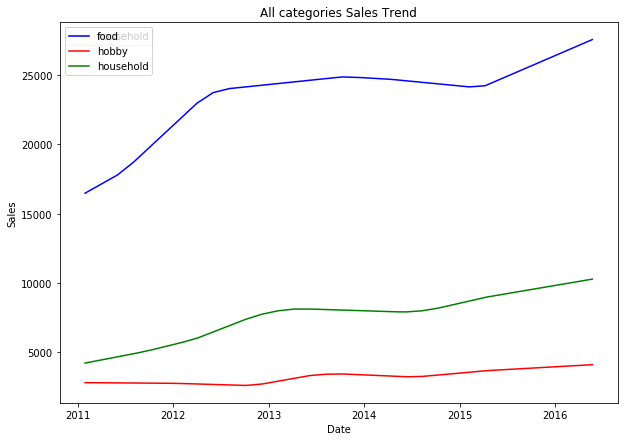

In [172]:
plt.figure(figsize=(10, 7))
ax1, =plt.plot(nforecast['Date'], nforecast['food_trend'],label="food", color='b')
ax2, =plt.plot(nforecast['Date'], nforecast['hobby_trend'],label="hobby", color='r')
ax3, =plt.plot(nforecast['Date'], nforecast['household_trend'],label="household", color='g')

ax1_legend = plt.legend(handles=[ax1])
a1 = plt.gca().add_artist(ax1_legend)
ax2_legend = plt.legend(handles=[ax2])
a2 = plt.gca().add_artist(ax2_legend)
ax3_legend = plt.legend(handles=[ax3])
a3 = plt.gca().add_artist(ax3_legend)

plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('All categories Sales Trend');

**PLOT : Sales Estimation**

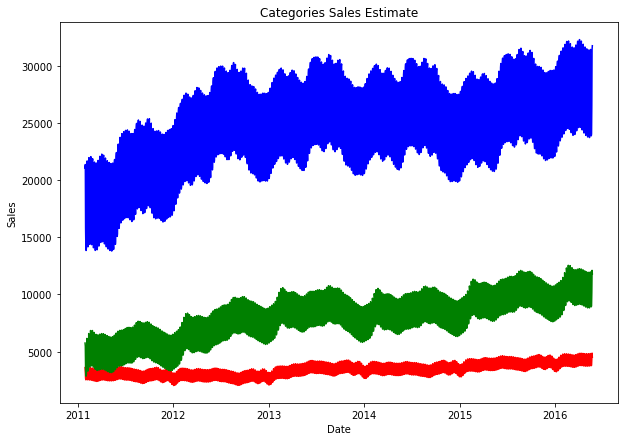

In [173]:
plt.figure(figsize=(10, 7))
plt.plot(nforecast['Date'], nforecast['food_yhat'], 'b-')
plt.plot(nforecast['Date'], nforecast['hobby_yhat'], 'r-')
plt.plot(nforecast['Date'], nforecast['household_yhat'], 'g-')

plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Categories Sales Estimate');

*extract prediction files*

In [174]:
food_forecast.to_csv("food_forecast.csv")
hobby_forecast.to_csv("hobby_forecast.csv", index=False)
household_forecast.to_csv("household_forecast.csv", index=False)

**Measure the Forecast Error**

In [176]:
#Here we do cross-validation to assess prediction performance 
#on a horizon of 28 days, starting with 1460 days (4 years) 
#of training data in the first cutoff and then 
#making predictions every 14 days. 
#On this 5 year time series, this corresponds to 31
#total forecasts.

**FOOD**

In [175]:
from fbprophet.diagnostics import cross_validation
food_cv = cross_validation(model_food, initial= "1460 days", period = "14 days", horizon = "28 days" )
food_cv.head()


INFO:fbprophet:Making 31 forecasts with cutoffs between 2015-02-01 00:00:00 and 2016-03-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-02,23143.924299,17783.804314,28490.083353,23799,2015-02-01
1,2015-02-03,21506.541189,16481.138392,26635.320290,25292,2015-02-01
2,2015-02-04,21225.302988,16101.107165,26150.901321,22528,2015-02-01
3,2015-02-05,21304.720952,15732.085964,26609.552232,23002,2015-02-01
4,2015-02-06,23933.322422,18581.600484,28913.715670,24697,2015-02-01


In [177]:
from fbprophet.diagnostics import performance_metrics
food_p = performance_metrics(food_cv)
food_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,5.360323e+06,2315.237227,1870.564570,0.079175,0.070590,0.970368
1,4 days,5.287631e+06,2299.484995,1890.487904,0.083577,0.077967,0.988372
2,5 days,1.246587e+07,3530.703541,2180.796087,21.431174,0.069468,0.956114
3,6 days,1.538988e+07,3922.993951,2578.017626,21.437279,0.069748,0.906977
4,7 days,1.685485e+07,4105.465451,2933.331801,16.622012,0.069748,0.845086


In [178]:
food_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
21,24 days,6.817548e+06,2611.043513,2022.227261,0.086787,0.073984,0.972993
22,25 days,6.273807e+06,2504.756965,1985.855038,0.085879,0.071534,0.976744
23,26 days,7.653085e+06,2766.421030,2056.240358,0.083121,0.063908,0.965116
24,27 days,9.066825e+06,3011.116875,2255.656339,0.081997,0.063913,0.935484
25,28 days,9.165332e+06,3027.429914,2371.526487,0.078991,0.065722,0.956114


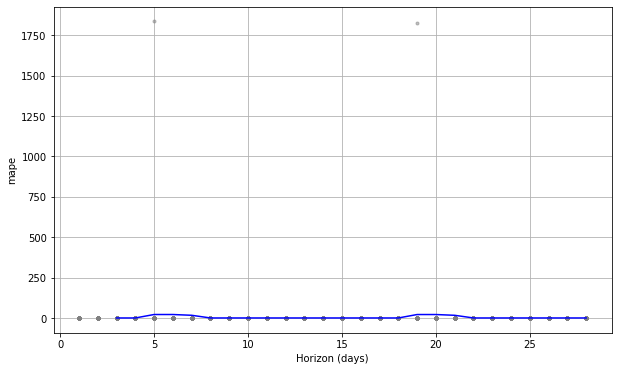

In [179]:
from fbprophet.plot import plot_cross_validation_metric
food__p_fig = plot_cross_validation_metric (food_cv, metric="mape")

In [180]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
r2_score(food_cv.yhat, food_cv.y)

0.0665500548179796

In [181]:
pip install ml_metrics


Note: you may need to restart the kernel to use updated packages.


In [182]:
import ml_metrics as metrics
metrics.rmse(food_cv.y, food_cv.yhat)

3072.1003895052927

In [183]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

mean_absolute_percentage_error(food_cv.y,food_cv.yhat)

430.48819706506345

**HOBBIES**

In [184]:
hobby_cv = cross_validation(model_hobby, initial= "1460 days", period = "14 days", horizon = "28 days" )
hobby_cv.head()

INFO:fbprophet:Making 31 forecasts with cutoffs between 2015-02-01 00:00:00 and 2016-03-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-02,3292.364485,2585.766377,3945.129465,3132,2015-02-01
1,2015-02-03,3163.212901,2447.893258,3839.516238,3716,2015-02-01
2,2015-02-04,3176.731819,2456.477275,3854.081205,3419,2015-02-01
3,2015-02-05,3178.922401,2481.907012,3864.108158,3795,2015-02-01
4,2015-02-06,3635.686982,2890.268808,4348.294061,3427,2015-02-01


In [185]:
hobby_p = performance_metrics(hobby_cv)
hobby_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,3 days,82875.488155,287.881031,232.310401,0.054952,1.000000
1,4 days,134129.894194,366.237483,255.488786,0.054205,0.988372
2,5 days,350688.296564,592.189409,323.886614,0.059712,0.953488
3,6 days,342728.367596,585.430071,321.903630,0.058831,0.944486
4,7 days,273350.846124,522.829653,324.050835,0.060574,0.961365


In [186]:
mean_absolute_percentage_error(hobby_cv.y,hobby_cv.yhat)

C:\Users\inspiron\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


inf

In [187]:
r2_score(hobby_cv.yhat, hobby_cv.y)

0.1612943480061747

**HOUSEHOLD**

In [188]:
household_cv = cross_validation(model_household, initial= "1460 days", period = "14 days", horizon = "28 days" )
household_cv.head()

INFO:fbprophet:Making 31 forecasts with cutoffs between 2015-02-01 00:00:00 and 2016-03-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-02,7494.310000,6069.405154,8921.416085,8075,2015-02-01
1,2015-02-03,6975.100753,5637.738839,8457.960518,8397,2015-02-01
2,2015-02-04,6938.861741,5482.627936,8282.668754,8045,2015-02-01
3,2015-02-05,7069.343517,5644.322240,8561.401026,7850,2015-02-01
4,2015-02-06,8282.754983,6782.148422,9780.989287,8685,2015-02-01


In [189]:
household_p = performance_metrics(household_cv)
household_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,5.390823e+05,734.222245,593.583483,0.070373,0.063751,0.972993
1,4 days,6.013580e+05,775.472784,613.967973,0.078096,0.067859,0.976744
2,5 days,1.648023e+06,1283.753412,782.684875,105.508734,0.076276,0.918605
3,6 days,1.730826e+06,1315.608687,803.156906,105.500687,0.070568,0.877344
4,7 days,1.760575e+06,1326.866737,901.501227,81.694453,0.069392,0.780570


In [190]:
r2_score(household_cv.yhat, household_cv.y)

0.4817760978123672

In [191]:
mean_absolute_percentage_error(household_cv.y,household_cv.yhat)

2101.209880332892